In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Task 9.1.12

Found maximum at x: -0.467974, f(x): -0.700512, iterations: 5.0
Found maximum at x: 2.767616, f(x): 0.282632, iterations: 5.0
Found minimum at x: 1.118872, f(x): -2.017829, iterations: 4.0


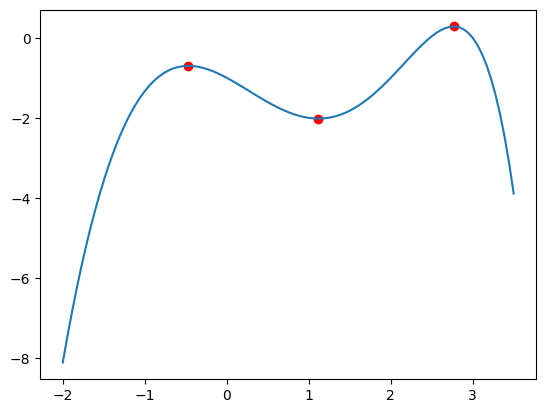

In [25]:
def print_results(extrema):
    for (x, y, iterations, f_dd) in extrema:
        if f_dd > 0:
            print(f"Found minimum at x: {x:.6f}, f(x): {y:.6f}, iterations: {iterations}")
        elif f_dd < 0:
            print(f"Found maximum at x: {x:.6f}, f(x): {y:.6f}, iterations: {iterations}")
        else:
            print(f"Found saddle point at x: {x:.6f}, f(x): {y:.6f}, iterations: {iterations}")
def f(x):
    return x**3 - 3**x

def f_prime(x):
    return 3 * x**2 - 3**x * math.log(3)

def f_double_prime(x):
    return 6 * x - 3**x * (math.log(3))**2

def newton_method(x0, tol=1e-6, max_iter=1000):
    x = x0
    iteration = 0
    while iteration < max_iter:
        x_new = x - f_prime(x) / f_double_prime(x)
        if abs(x_new - x) < tol:
            break
        x = x_new
        iteration += 1
    return x, iteration

def find_extrema(a, b):
    extrema = []
    start_points = [a, b, (a + b) / 2]  # Выберем начальные точки: края интервала и середину

    for x0 in start_points:
        try:
            extremum_x, iterations = newton_method(x0)
            if a <= extremum_x <= b:  # Проверка на попадание в интервал
                extremum_y = f(extremum_x)
                extrema.append((extremum_x, extremum_y, iterations, f_double_prime(extremum_x)))
        except ZeroDivisionError:  # Обработка возможных разделений на 0 в методе Ньютона
            continue

    return np.array(extrema)
# Интервал [a, b]
a, b = -2, 3.5
extrema = find_extrema(a, b)
# Применение функции
x_c, y_c = extrema[:,0],extrema[:,1]
x = np.linspace(a, b, 100)
y = f(x)
plt.plot(x, y);
plt.scatter(x_c, y_c, c ='red');
print_results(extrema)


# Task 9.4.4

Минимум функции f(x) на отрезке [0, 6]: x = 2.8194305312830164, f(x) = -0.38079105845016825
Максимум функции f(x) на отрезке [0, 6]: x = 3.4636698433846895, f(x) = 0.3807910696025357


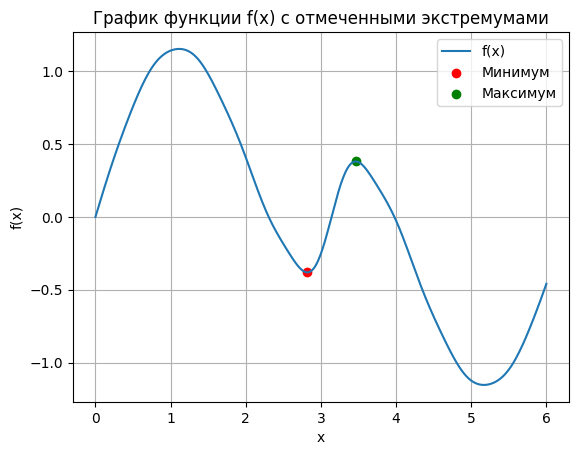

In [42]:
from scipy.optimize import minimize_scalar

# Параметры задачи
x1, x2 = 0, 6  # Интервал на котором строим график
eps = 0.001   # Точность
max_iter = 1000 # Максимальное число итераций
n_terms = 300  # Общее количество членов ряда (можно варьировать)
def u(n, x):
    return (-1)**n * np.sin(n * x) / (n**2 - 1.5**2)

def f(x, num_terms=10):
    return sum(u(n, x) for n in range(1, num_terms + 1))

# Построение графика функции на отрезке [x1, x2]
x_values = np.linspace(x1, x2, 400)
y_values = [f(x) for x in x_values]

result_min = minimize_scalar(f, bounds=(x1, x2), method='bounded', options={'xatol': eps})
min_x, min_y = result_min.x, result_min.fun
print(f"Минимум функции f(x) на отрезке [{x1}, {x2}]: x = {min_x}, f(x) = {min_y}")

# Нахождение максимума путем минимизации отрицательной функции (-f)
result_max = minimize_scalar(lambda x: -f(x), bounds=(x1, x2), method='bounded', options={'xatol': eps})
max_x, max_y = result_max.x, -result_max.fun
print(f"Максимум функции f(x) на отрезке [{x1}, {x2}]: x = {max_x}, f(x) = {max_y}")

# Построение графика с отмеченными минимумом и максимумом
plt.plot(x_values, y_values, label='f(x)')
plt.scatter([min_x], [min_y], color='red', marker='o', label='Минимум')
plt.scatter([max_x], [max_y], color='green', marker='o', label='Максимум')
plt.title("График функции f(x) с отмеченными экстремумами")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


# Task 9.5.12

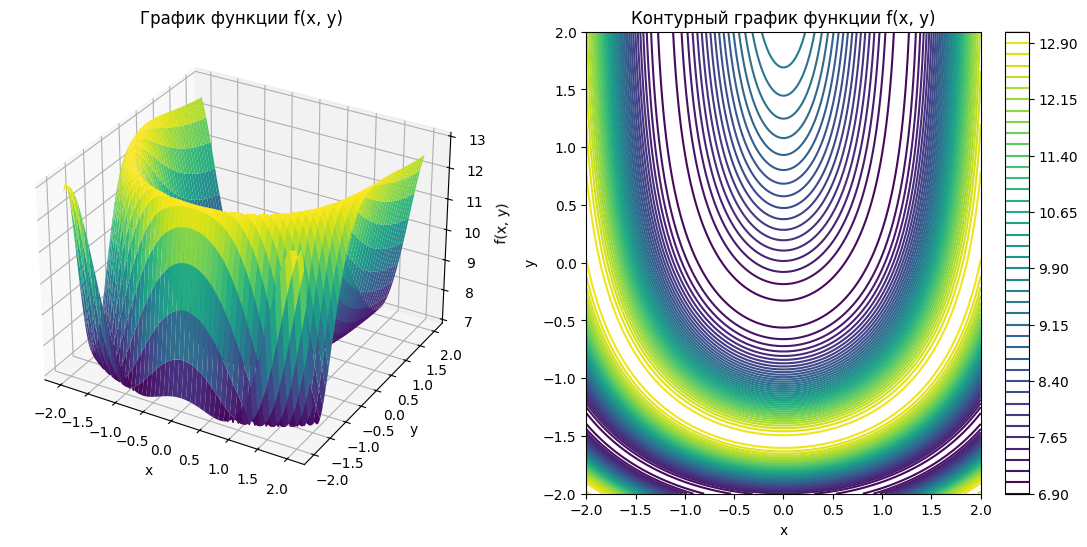

Экстремум 1: x = 0.6367186482174094, y = -0.1530508591707299, f(x, y) = 7.000000000003118
Экстремум 2: x = 1.0933662015950216, y = 0.9799546521860423, f(x, y) = 7.000000000516556
Экстремум 3: x = 0.0, y = -0.45165668379205387, f(x, y) = 7.000000020256957


In [44]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

# Задаем функцию двух переменных
def f(coords):
    x, y = coords
    return x2 + 4*y2 - 3 * np.sin(x**2 + np.exp(-y))

# Определяем границы прямоугольника
x1, x2 = -2, 2
y1, y2 = -2, 2

# Построение графика функции
x = np.linspace(x1, x2, 400)
y = np.linspace(y1, y2, 400)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])

fig = plt.figure(figsize=(14, 6))

# Построение 3D-графика
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_title('График функции f(x, y)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')

# Построение контурного графика
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, 50, cmap='viridis')
ax2.set_title('Контурный график функции f(x, y)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
fig.colorbar(contour)

plt.show()

# Начальные приближения эктремумов (по графикам можно выбрать несколько начальных точек)
initial_guesses = [(-1, -1), (1, 1), (0, 0)]  # Например, выберем несколько точек для начальных приближений

# Поиск минимумов функции с заданной точностью
results = []
for guess in initial_guesses:
    result = minimize(f, guess, bounds=[(x1, x2), (y1, y2)], tol=1e-6)
    results.append(result)

# Вывод результатов
for i, res in enumerate(results):
    print(f"Экстремум {i+1}: x = {res.x[0]}, y = {res.x[1]}, f(x, y) = {res.fun}")


# Task 9.6.12

Минимум функции f(x, y) найден в точке x = [2.  4.5], f(x, y) = -14.25
Количество итераций: 1


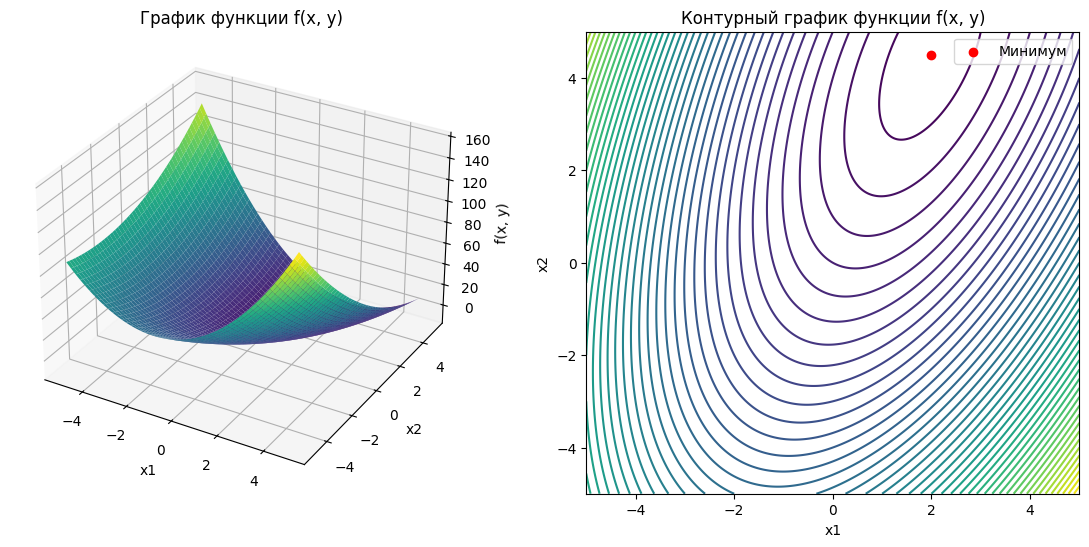

In [46]:
from numpy.linalg import norm, inv

# Определяем функцию
def f(x):
    a1, a12, a22, a13, a23 = 3, -1, 1, -1.5, -2.5
    x1, x2 = x
    return a1*x1**2 + 2*a12*x1*x2 + a22*x2**2 + 2*a13*x1 + 2*a23*x2

# Градиент функции
def grad_f(x):
    a1, a12, a22, a13, a23 = 3, -1, 1, -1.5, -2.5
    x1, x2 = x
    df_dx1 = 2*a1*x1 + 2*a12*x2 + 2*a13
    df_dx2 = 2*a12*x1 + 2*a22*x2 + 2*a23
    return np.array([df_dx1, df_dx2])

# Гессиан функции
def hessian_f(x):
    a1, a12, a22, a13, a23 = 3, -1, 1, -1.5, -2.5
    return np.array([
        [2*a1, 2*a12],
        [2*a12, 2*a22]
    ])

# Метод сопряженных градиентов для системы линейных уравнений Ax=b
def conjugate_gradient(A, b, x0, tol=1e-6, max_iter=1000):
    x = x0
    r = b - A @ x
    p = r
    for i in range(max_iter):
        Ap = A @ p
        r_dot_r = r @ r
        alpha = r_dot_r / (p @ Ap)
        x = x + alpha * p
        r_next = r - alpha * Ap
        if norm(r_next) < tol:
            break
        beta = (r_next @ r_next) / r_dot_r
        p = r_next + beta * p
        r = r_next
    return x, i+1

# Метод Ньютона с сопряженными градиентами
def newton_conjugate_gradient(x0, tol=1e-6, max_iter=100):
    x = x0
    iter_count = 0
    while iter_count < max_iter:
        grad = grad_f(x)
        if norm(grad) < tol:
            break
        hess = hessian_f(x)
        delta_x, cg_iter = conjugate_gradient(hess, -grad, np.zeros_like(x), tol)
        x = x + delta_x
        iter_count += 1
    return x, f(x), iter_count

# Начальная точка
x0 = np.array([0, 0])

# Поиск минимума
minimum, f_min, iterations = newton_conjugate_gradient(x0)

print(f"Минимум функции f(x, y) найден в точке x = {minimum}, f(x, y) = {f_min}")
print(f"Количество итераций: {iterations}")

# Построение графика функции
x1_range = np.linspace(-5, 5, 400)
x2_range = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = np.vectorize(lambda x1, x2: f([x1, x2]))(X1, X2)

fig = plt.figure(figsize=(14, 6))

# 3D-график
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X1, X2, Z, cmap='viridis')
ax1.set_title('График функции f(x, y)')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('f(x, y)')

# Контурный график
ax2 = fig.add_subplot(122)
contour = ax2.contour(X1, X2, Z, 50, cmap='viridis')
ax2.scatter(minimum[0], minimum[1], color='red', label='Минимум')
ax2.set_title('Контурный график функции f(x, y)')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.legend()

plt.show()
